# Initialization

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

import torch

In [2]:
torch.manual_seed(0)

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "white", "blue"])

# Generate Dataset

In [4]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4,  random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


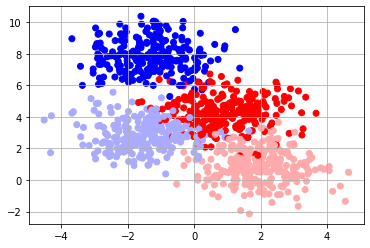

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.grid(True)
plt.show()

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


# Using torch Tensors and AutoGrad

In [7]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [8]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [9]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1
  h1 = a1.sigmoid()
  a2 = torch.matmul(h1, weights2) + bias2
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [10]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [11]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

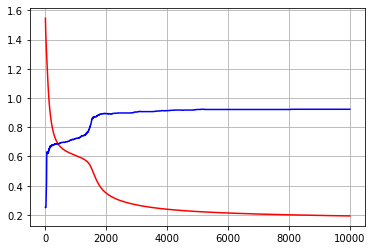

Loss before Training 1.5456440448760986
Loss after Training 0.19288595020771027


In [12]:
torch.manual_seed(0)
weights1 = torch.randn(2,2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad = True)

weights2 = torch.randn(2,4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs  = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.grid(True)
plt.show()
print('Loss before Training', loss_arr[0])
print('Loss after Training', loss_arr[-1])

# Use of NN Sequential

In [18]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [14]:
def fit_N(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr = learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.grid(True)
  print('Loss before Training', loss_arr[0])
  print('Loss after Training', loss_arr[-1])

In [19]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2),
        nn.Sigmoid(),
        nn.Linear(2, 4),
        nn.Softmax()
    )
  
  def forward(self, X):
    return self.net(X)

Loss before Training 1.395160436630249
Loss after Training 0.8738409876823425


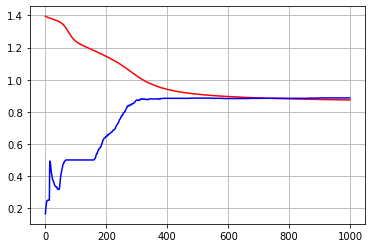

In [20]:
fn = FirstNetwork()
fit_N()

In [ ]:
#end